In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import skimage

In [2]:
img = cv.imread('foreground/fg-1.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [3]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

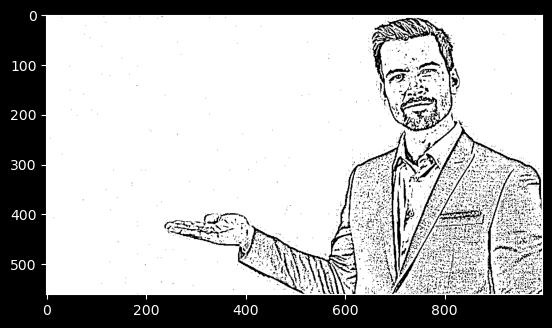

In [4]:
plt.imshow(binary_mask, cmap='gray')

In [5]:
binary_mask = cv.bitwise_not(binary_mask)

In [6]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 37, 10, 25)

In [7]:
binary_mask = skimage.morphology.opening(binary_mask, np.ones((3, 3)))

In [8]:
# binary_mask = cv.erode(binary_mask, (21,21), iterations=3)
# binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

In [9]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 3, 7, 5)


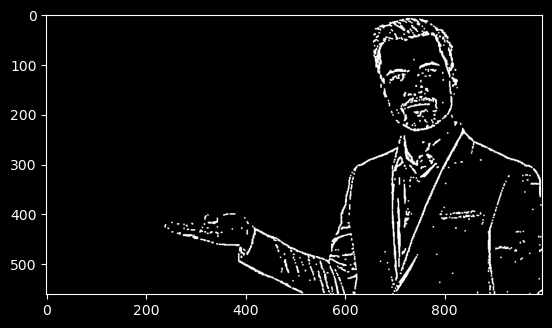

In [10]:
plt.imshow(binary_mask, cmap='gray')


In [11]:
binary_mask = cv.bitwise_not(binary_mask)

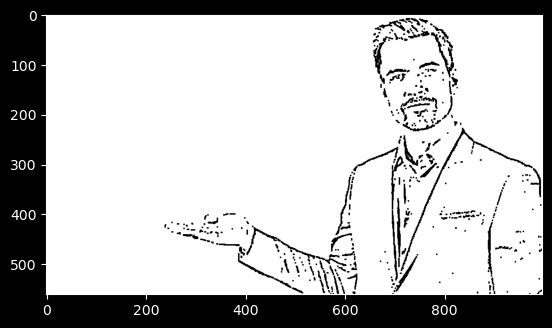

In [12]:
plt.imshow(binary_mask, cmap='gray')

In [13]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [14]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [15]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [16]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3]], dtype=uint8),
 array([[5.18248837e-06, 5.93643678e-01, 2.02920332e-02, 3.86053924e-01,
         5.18248837e-06, 1.03000000e+02, 9.05000000e+01, 8.85000000e+01,
         1.12853825e+02, 2.03228799e+02, 1.24977442e+02, 1.19346571e+02,
         1.95370834e+02, 1.30812157e+02, 1.00573357e+02, 1.85630007e+02,
         1.14093943e+02, 2.07500000e+02, 1.95500000e+02, 1.93500000e+02,
         9.01000000e+00, 7.50000000e+00, 7.50000000e+00, 7.50000000e+00,
         6.26000000e+00, 6.25000000e+00, 7.50000000e+00, 6.25000000e+00,
         6.26000000e+00, 2.78409615e+01, 1.87414971e+01, 1.15031104e+01,
         1.87414971e+01, 1.93647468e+01, 1.13111597e+01, 1.15031104e+01,
         1.13111597e+01, 7.10065396e+00, 1.01650033e+02, 5.93214860e+01,
         6.25849580e+01, 5.93214860e+01, 1.5

In [17]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [18]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

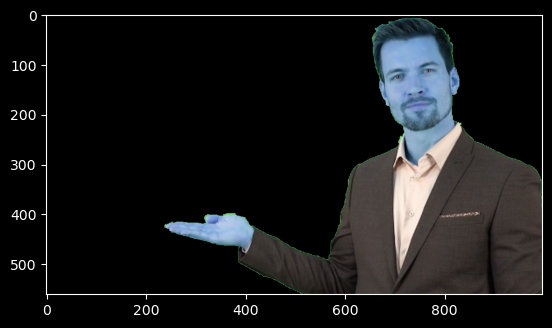

In [19]:
plt.imshow(segmented_image)

In [20]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [21]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

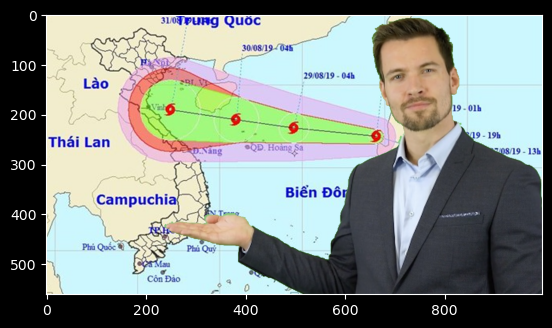

In [22]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)